Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, we present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.**

Source
This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India. Gathered over the period by ICFA, India.

Data fields

- N - ratio of Nitrogen content in soil
- P - ratio of Phosphorous content in soil
- K - ratio of Potassium content in soil
- temperature - temperature in degree Celsius
- humidity - relative humidity in %
- ph - ph value of the soil
- rainfall - rainfall in mm

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [81]:
data_path = "./Crop_recommendation.csv"
df = pd.read_csv(data_path)

In [82]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [83]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [84]:
crops = set(df["label"].unique())
for i,crop in enumerate(crops):
    print(f"{i} -> {crop}")

0 -> kidneybeans
1 -> maize
2 -> apple
3 -> mothbeans
4 -> orange
5 -> pigeonpeas
6 -> cotton
7 -> rice
8 -> lentil
9 -> muskmelon
10 -> jute
11 -> coconut
12 -> blackgram
13 -> chickpea
14 -> papaya
15 -> pomegranate
16 -> coffee
17 -> mungbean
18 -> mango
19 -> grapes
20 -> banana
21 -> watermelon


##### Data Is Balanced

In [85]:
df["label"].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [86]:
length = df.shape
print(f"Data is having {length[0]} rows and {length[1]} columns")
null_vals = df.isna().sum().sum()
print(f"Data is containing {null_vals} Null Values")

Data is having 2200 rows and 8 columns
Data is containing 0 Null Values


In [87]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Univariate Analysis

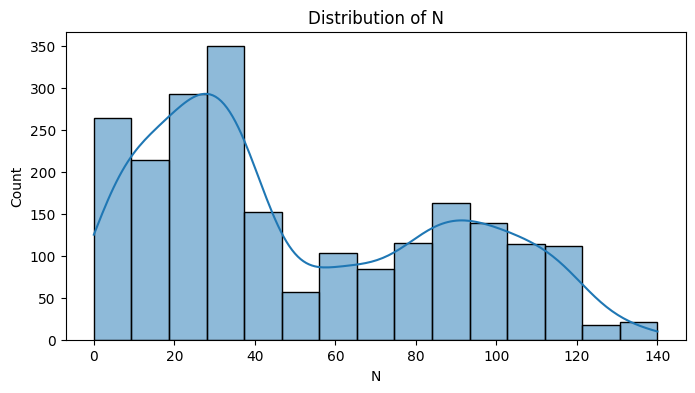

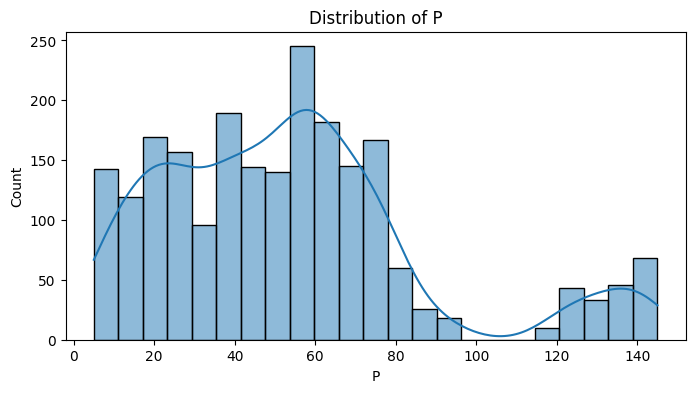

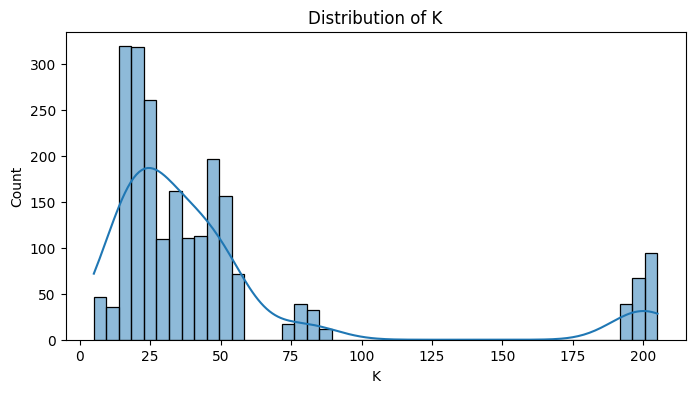

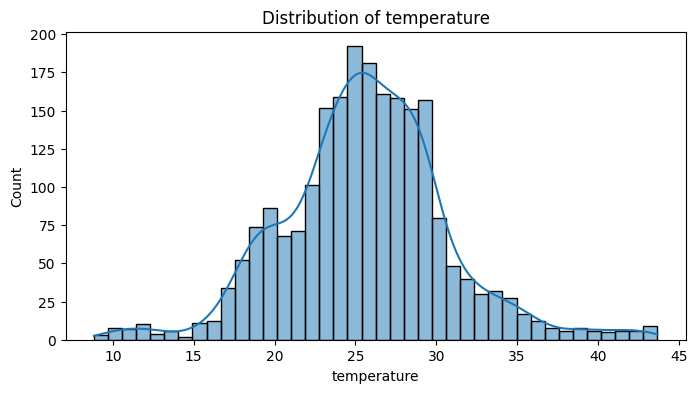

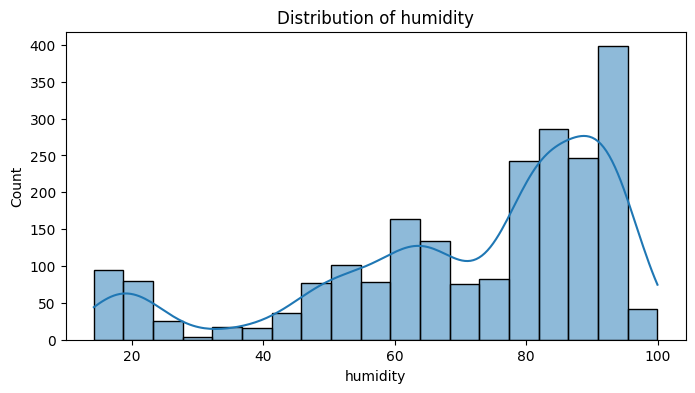

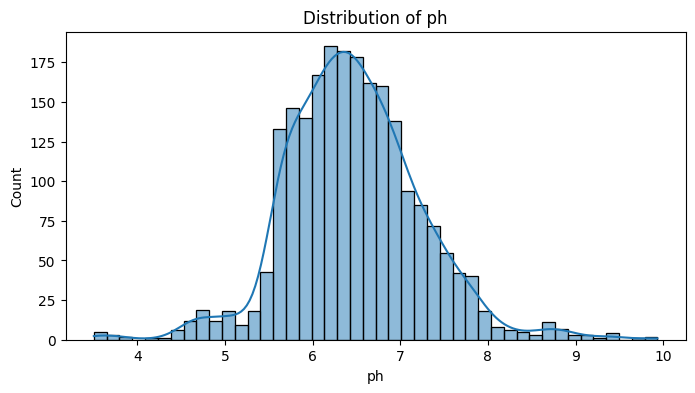

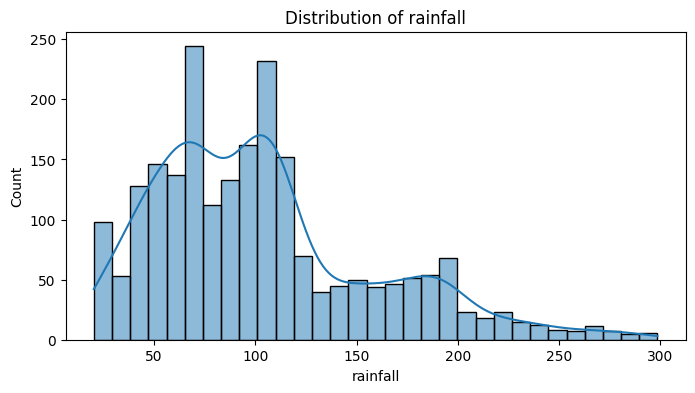

In [88]:
num_vals = ["N","P","K","temperature","humidity","ph","rainfall"]

for col in num_vals:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    

## Target Variable Analysis

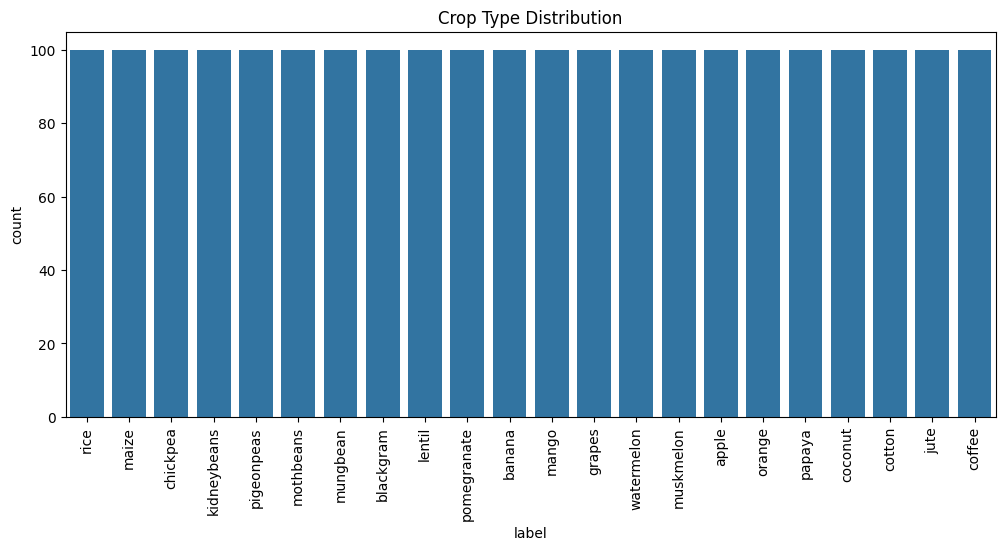

In [89]:
plt.figure(figsize=(12,5))
sns.countplot(x="label", data=df, order=df['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Crop Type Distribution")
plt.show()


## Bivariate Analysis (Feature vs Crop)

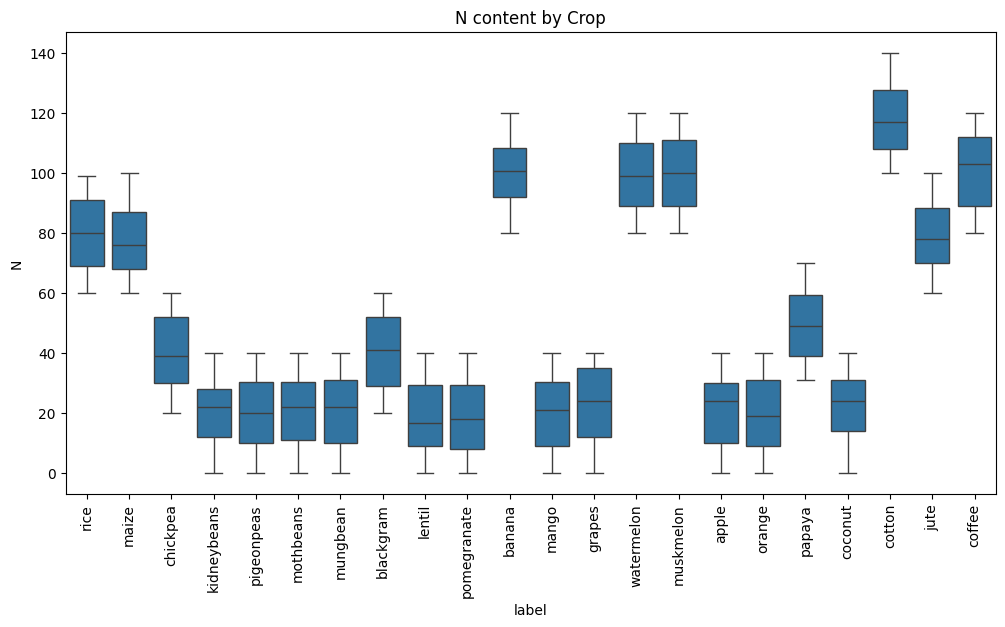

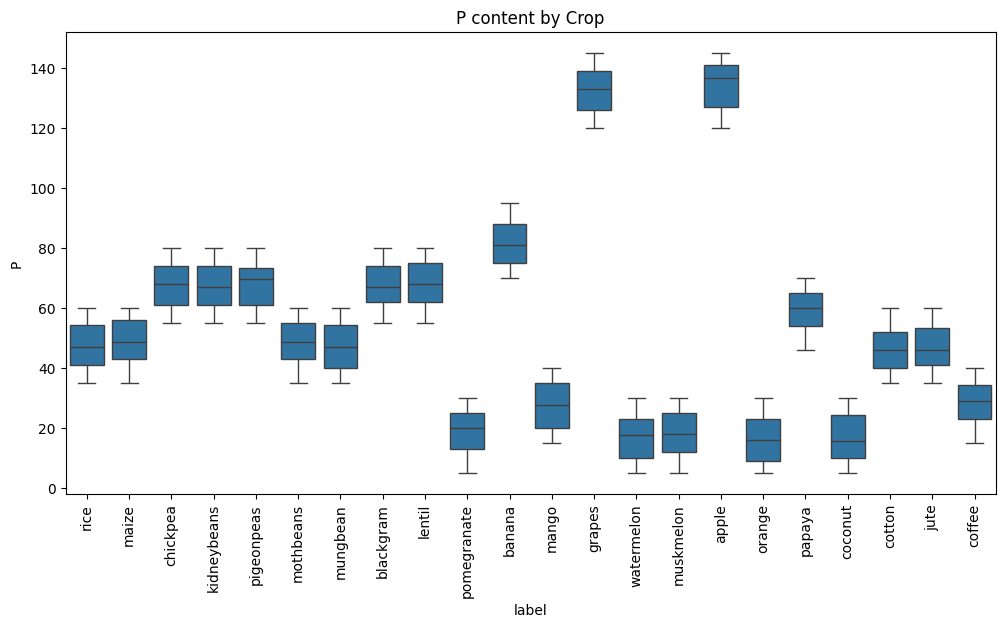

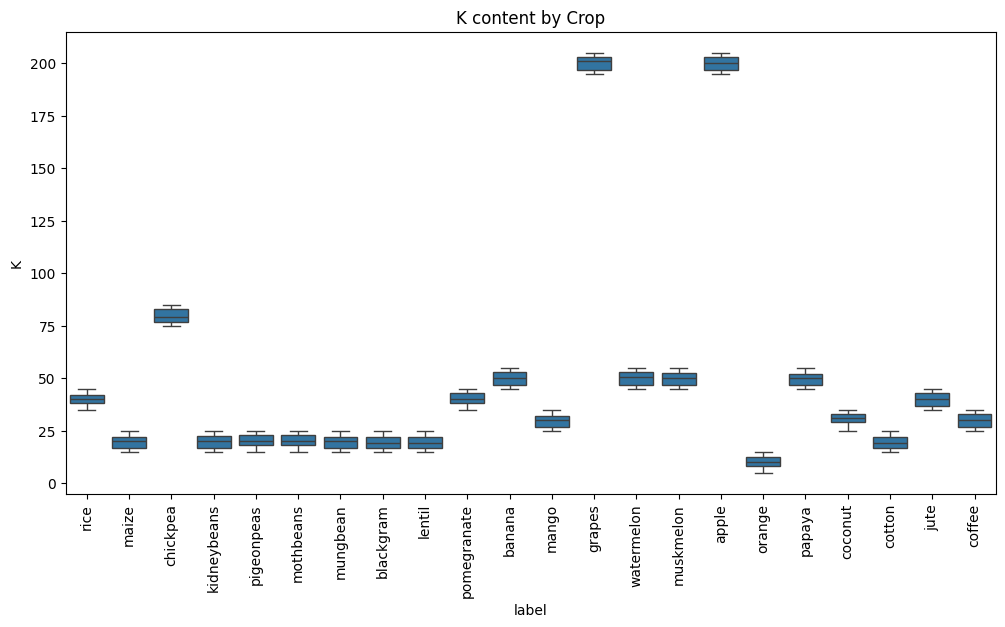

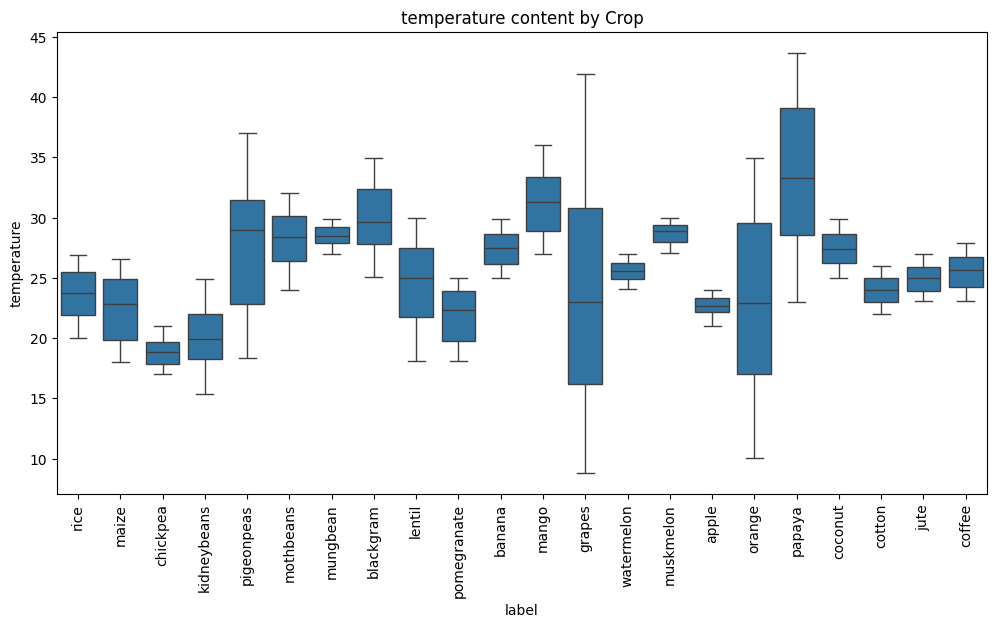

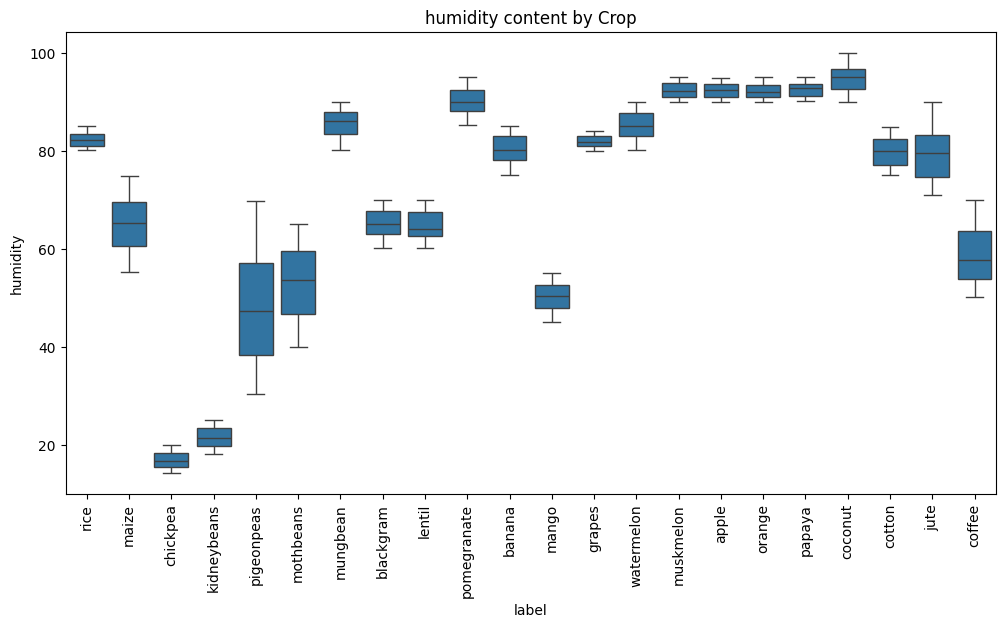

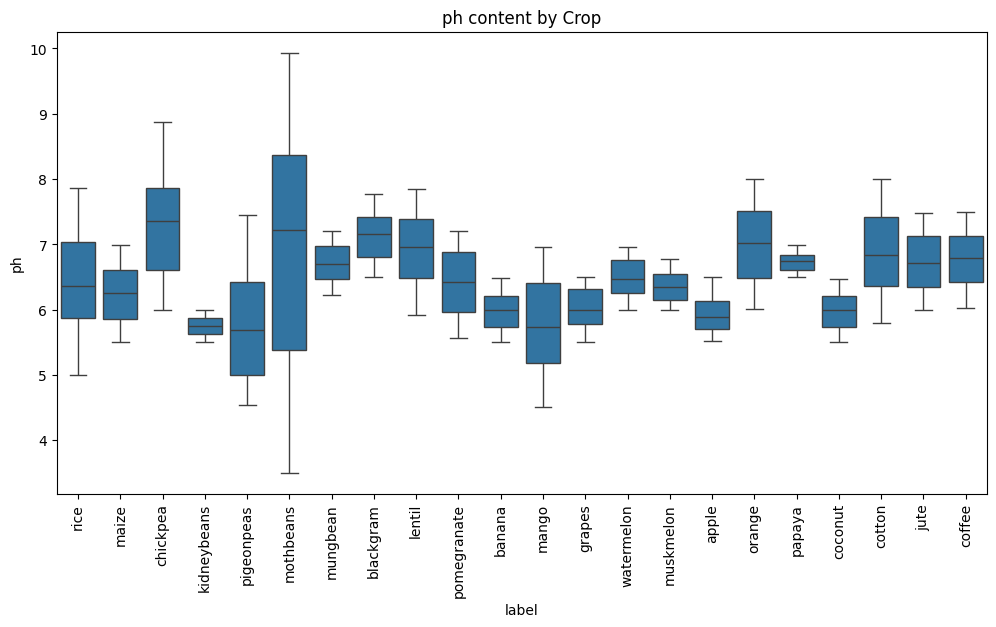

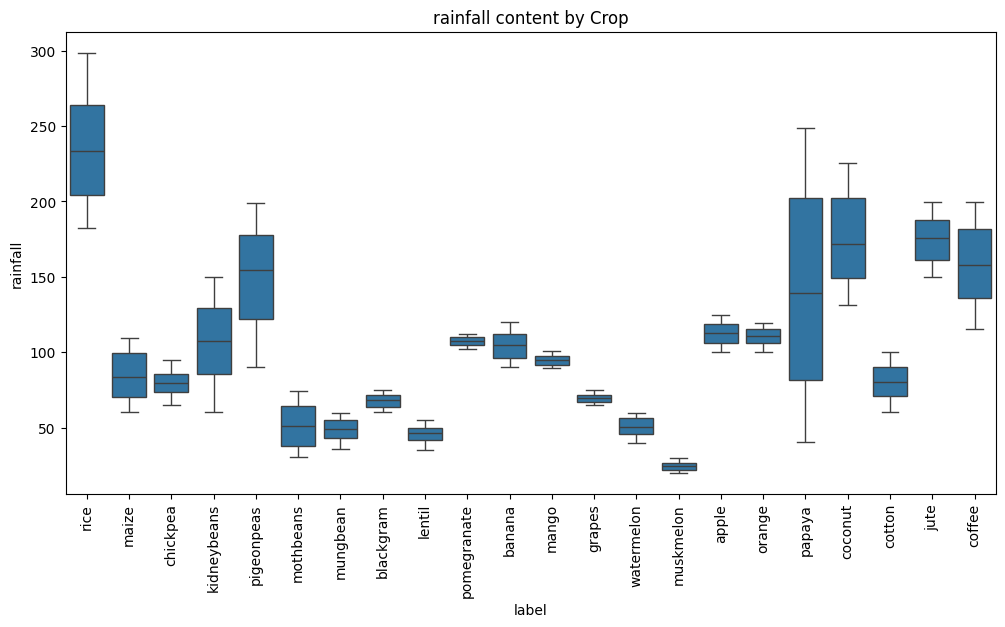

In [90]:
for num in num_vals:
    plt.figure(figsize=(12,6))
    sns.boxplot(x="label", y=num, data=df)
    plt.xticks(rotation=90)
    plt.title(f"{num} content by Crop")
    plt.show()


## Insights from Heatmap

- P and K -> highly correlated
- Rainfall is independent can be a discriminator

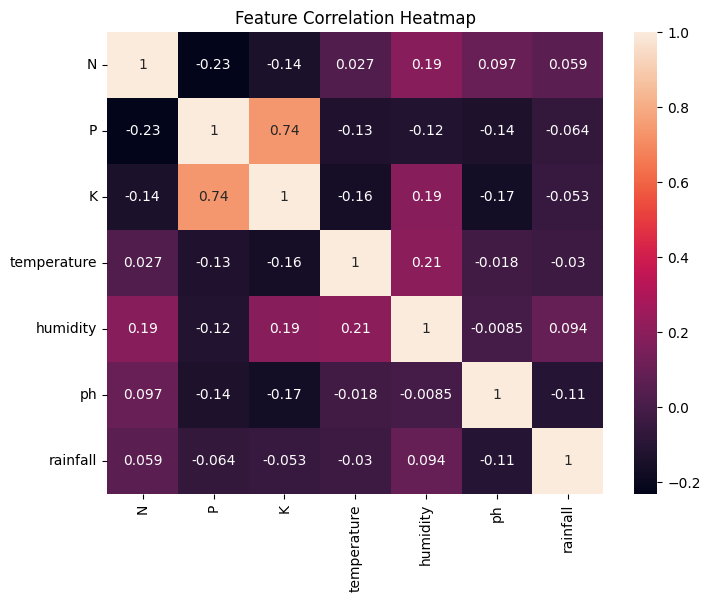

In [91]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_vals].corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

## Model Building

In [92]:
X = df.drop("label",axis=1)
y = df["label"]
le = LabelEncoder()
y = le.fit_transform(y)

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,shuffle=True,random_state=42)

In [94]:
print(f"Length of X_train: {X_train.shape[0]}")
print(f"Length of y_train: {y_train.shape[0]}")

print(f"Length of X_test: {X_test.shape[0]}")
print(f"Length of y_test: {y_test.shape[0]}")

Length of X_train: 1760
Length of y_train: 1760
Length of X_test: 440
Length of y_test: 440


In [104]:
models = {
    "Logistic Regression": LogisticRegression(solver="saga", max_iter=5000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric="mlogloss"),
}

## Insights

- Tree-based models (RF, XGBoost, GB) perform well -> they capture nonlinear interactions between soil nutrients & weather well.

- SVM is also excellent, probably because the dataset is well-separated in feature space.

- Logistic regression underfits -> good baseline but too simple

In [107]:
import pandas as pd

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Train Precision": precision_score(y_train, y_train_pred, average='macro'),
        "Test Precision": precision_score(y_test, y_test_pred, average='macro'),
        "Train Recall": recall_score(y_train, y_train_pred, average='macro'),
        "Test Recall": recall_score(y_test, y_test_pred, average='macro'),
        "Train F1": f1_score(y_train, y_train_pred, average='macro'),
        "Test F1": f1_score(y_test, y_test_pred, average='macro'),
    }
    print(f"Model Name: {name}")
    results.append(metrics)
    print(f"\nModel Name: {name}")
    for k, v in metrics.items():
        if k != "Model":   
            print(f"{k}: {v:.4f}")
    print("="*40)

Model Name: Logistic Regression

Model Name: Logistic Regression
Train Accuracy: 0.9795
Test Accuracy: 0.9455
Train Precision: 0.9797
Test Precision: 0.9471
Train Recall: 0.9795
Test Recall: 0.9455
Train F1: 0.9795
Test F1: 0.9453
Model Name: KNN

Model Name: KNN
Train Accuracy: 0.9852
Test Accuracy: 0.9773
Train Precision: 0.9862
Test Precision: 0.9785
Train Recall: 0.9852
Test Recall: 0.9773
Train F1: 0.9853
Test F1: 0.9772
Model Name: SVM

Model Name: SVM
Train Accuracy: 0.9767
Test Accuracy: 0.9841
Train Precision: 0.9796
Test Precision: 0.9866
Train Recall: 0.9767
Test Recall: 0.9841
Train F1: 0.9766
Test F1: 0.9839
Model Name: Random Forest

Model Name: Random Forest
Train Accuracy: 1.0000
Test Accuracy: 0.9932
Train Precision: 1.0000
Test Precision: 0.9935
Train Recall: 1.0000
Test Recall: 0.9932
Train F1: 1.0000
Test F1: 0.9932
Model Name: Gradient Boosting

Model Name: Gradient Boosting
Train Accuracy: 1.0000
Test Accuracy: 0.9886
Train Precision: 1.0000
Test Precision: 0.9897

In [110]:
results_df = pd.DataFrame(results)
results_df.sort_values(by="Test Accuracy", ascending=False).reset_index(drop=True)

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,XGBoost,1.000000,0.993182,1.000000,0.993506,1.000000,0.993182,1.000000,0.993116
1,Random Forest,1.000000,0.993182,1.000000,0.993506,1.000000,0.993182,1.000000,0.993178
2,Gradient Boosting,1.000000,0.988636,1.000000,0.989742,1.000000,0.988636,1.000000,0.988723
3,SVM,0.976705,0.984091,0.979566,0.986580,0.976705,0.984091,0.976619,0.983908
4,KNN,0.985227,0.977273,0.986166,0.978474,0.985227,0.977273,0.985269,0.977231
5,Logistic Regression,0.979545,0.945455,0.979745,0.947130,0.979545,0.945455,0.979509,0.945328


In [ ]:
rf = RandomForestClassifier()
xg = XGBClassifier()
svm = SVC()

# Parameter grid
rf_param_grid = {
    "n_estimators": [100, 200, 300],       # number of trees
    "max_depth": [None, 10, 20, 30],       # depth of each tree
    "min_samples_split": [2, 5, 10],       # min samples to split
    "min_samples_leaf": [1, 2, 4],         # min samples at leaf
    "bootstrap": [True, False]
}
# svm_param_grid =  {
#     "C": [0.1, 1, 10, 100],         # Regularization strength
#     "gamma": [1, 0.1, 0.01, 0.001], # Kernel coefficient
#     "kernel": ["rbf", "poly", "sigmoid"]
# }

xgb_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.8, 1]
}


In [117]:
#Models List for Hypermater tuning
model_param = {}
grid_search_cv_models = [
     ("RF", RandomForestClassifier(), rf_param_grid),
     ("XG",XGBClassifier(), xgb_param_grid),
]

for name,model,param in grid_search_cv_models:
     grid_search = GridSearchCV(
     estimator=model,
     param_grid=param,
     cv=5,
     scoring="accuracy",
     n_jobs=-1,
     verbose=2
     )
     grid_search.fit(X_train,y_train)
     model_param[name] = grid_search.best_params_
for model_name in model_param:
    print(f"--------------------Best Paarams for {model_name}-------------------")
    print(model_param[model_name])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
--------------------Best Paarams for RF-------------------
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
--------------------Best Paarams for XG-------------------
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [119]:
best_rf = RandomForestClassifier(
    max_depth=None, 
    min_samples_split=5, 
    n_estimators=100,
    random_state=42
)
best_rf.fit(X_train, y_train)


RandomForestClassifier(min_samples_split=5, random_state=42)

In [120]:

best_xg = XGBClassifier(
    learning_rate=0.2, 
    max_depth=3, 
    n_estimators=200, 
    subsample=0.8,
    use_label_encoder=False, 
    eval_metric="mlogloss",
    random_state=42
)
best_xg.fit(X_train, y_train)

d:\Edunet\EdunetEnv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:00:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [121]:
best_models = {
    "Random Forest":best_rf,
    "XGBoost": best_xg
}

In [122]:
import pandas as pd

results = []

for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Train Precision": precision_score(y_train, y_train_pred, average='macro'),
        "Test Precision": precision_score(y_test, y_test_pred, average='macro'),
        "Train Recall": recall_score(y_train, y_train_pred, average='macro'),
        "Test Recall": recall_score(y_test, y_test_pred, average='macro'),
        "Train F1": f1_score(y_train, y_train_pred, average='macro'),
        "Test F1": f1_score(y_test, y_test_pred, average='macro'),
    }
    print(f"Model Name: {name}")
    results.append(metrics)
    print(f"\nModel Name: {name}")
    for k, v in metrics.items():
        if k != "Model":   
            print(f"{k}: {v:.4f}")
    print("="*40)

Model Name: Random Forest

Model Name: Random Forest
Train Accuracy: 1.0000
Test Accuracy: 0.9955
Train Precision: 1.0000
Test Precision: 0.9957
Train Recall: 1.0000
Test Recall: 0.9955
Train F1: 1.0000
Test F1: 0.9955


d:\Edunet\EdunetEnv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:02:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model Name: XGBoost

Model Name: XGBoost
Train Accuracy: 1.0000
Test Accuracy: 0.9886
Train Precision: 1.0000
Test Precision: 0.9891
Train Recall: 1.0000
Test Recall: 0.9886
Train F1: 1.0000
Test F1: 0.9886


In [123]:
import joblib
joblib.dump(best_rf,"best_model.pkl")

['best_model.pkl']

In [124]:
joblib.dump(le,"label_encoder.pkl")

['label_encoder.pkl']